<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Tatyana-Nekrasova-folder/Tatyana%20Nekrasova/%D0%9D%D0%B5%D0%BA%D1%80%D0%B0%D1%81%D0%BE%D0%B2%D0%B0%D0%A2_%D0%92__%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3_%D0%B8%D1%82%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание модели нейронной сети для рекомендательной системы для профпатолога (INSPECTRUM CLINIC)

Студент: Некрасова Т.В.

Постановка задачи
Цель:
Разработать прототип системы, реализующей функцию рекомендательной системы для врача профпатолога.

Принцип работы:
Система должна помогать врачу вынести решение о том годен, не годен или ограниченно годен человек на определенной должности.
В датасете целевым столбцом для предсказания нейросетью является столбец под названием: “ЗаключениеМК”.
Точность рекомендации должна быть не ниже 95%.


## Подключение необходимых библиотек и модулей

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv1D, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, Concatenate
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Загрузка файла из облака в colab
import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx', None, quiet=True)

'%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx'

In [ ]:
data = pd.read_excel('/content/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape # кол-во строк и столбцов

(1982, 4587)

## Работа с таблицей
Удалены все столбы со значением Nan, все строки в столбце целевой переменной со значением Nan, отобраны столбцы с данными, которые на мой взгляд являбтся опрелящими для вынесения решения. Значения целевой переменной были приведены к двум классам - "Годен" и "Ограниченно годен", это сделано по двум причинам - во-первых, слишком маленькая представленность в данном датасета данных класса ""Не годен" и "Ограничено годен", и даже обьеденив их получаем 137 значений  против 1434 значений класса "Годен", что явлеяется достаточно серьезной разбалансировкой и может привести к некорректной работе модели. Во-вторых, данная работа является рекомендательной системой, что подразумевает под собой перепроверку данных, полученных от узких специалистов, для вынесения врачебного вердикта врачом-профпатологом.

In [ ]:
# удалить столбцы, в которых нет ни одного значения
data.dropna(axis=1, how='all', inplace=True)
print(data.shape)


(1982, 3703)


In [ ]:
# удалить строки с пустыми значениями в столбце ЗаключениеМК
data.dropna(subset=['ЗаключениеМК'], inplace=True)
print(data.shape)


(1575, 3703)


In [ ]:
# удалить ошибочные данные
data = data.drop(data[data['ЗаключениеМК'] == 'машинист бульдозера'].index)
data = data.drop(data[data['ЗаключениеМК'] == 'Газоспасатель'].index)
data = data.drop(data[data['ЗаключениеМК'] == ' Газоспасатель'].index)

In [ ]:
# просмотр значений в целевой колонке
data['ЗаключениеМК'].value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

In [ ]:
# перенос в новый датасет колонок, котрые на мой взгляд будут влиять на результат
import re

data_1 = data.filter(regex=re.compile(r'ГоденНегоден_ЗначениеПредставление|ВредныеФакторы|ЗаключениеМК|Профессия|Диспансерная|Психосвидетельствование|МКБ'))
print(data_1.shape)

(1571, 129)


In [ ]:
# Замена NAN на 0 соответствующего типа
for i in data_1.columns.values.tolist():
    if data_1[i].dtypes==object:
       data_1[i]= data_1[i].fillna('0')
    elif data_1[i].dtypes==int or  data_1[i].dtypes==float:
       data_1[i]= data_1[i].fillna(0)

In [ ]:
# преобразование значений в целевой колонке к трем классам
data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})
data_1['ЗаключениеМК'].value_counts()

<ipython-input-12-b70b2ebabfa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})


Годен               1434
ОграниченноГоден     137
Name: ЗаключениеМК, dtype: int64

In [ ]:
# удаление дублирующей колонки и колонки с значением nan (они нашлись придальнейшей обработке таблицы)
data_1 = data_1.drop('ЗаключениеМКПредставление',  axis=1)


In [ ]:
data_1 = data_1.drop('ДиспансернаяГруппа',  axis=1)

In [ ]:
data_1

,Профессия,ЗаключениеМК,ДиспансернаяГруппаПредставление,ВредныеФакторы,ПсихиатрияНаркология1_МКБ101,ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление,Офтальмология1_МКБ101,Офтальмология1_ГоденНегоден_ЗначениеПредставление,Оториноларингология1_МКБ101,Оториноларингология1_ГоденНегоден_ЗначениеПредставление,...,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия3_ГоденНегоден_ЗначениеПредставление,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Психиатрия4_ГоденНегоден_ЗначениеПредставление,Оториноларингология3_МКБ101,Оториноларингология3_ГоденНегоден_ЗначениеПредставление
0,Ведущий специалист по организации обуения,Годен,I,11.4,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
1,Ведущий специалист,Годен,IIIа,4.2.5,Z00.0,Годен,Z00.0,Годен,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Главный менеджер,ОграниченноГоден,II,4.2.5,Z00.0,Годен,H52.1,Годен,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Главный специалист,Годен,I,11.1,0,0,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
4,Старший специалист,ОграниченноГоден,II,11.1,0,0,H52.2,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Инженер,Годен,I,"4.4,4.5,6.1",Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
1962,Начальник лаборатории,Годен,I,4.4,Z00.0,Годен,0,0,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
1972,"Инженер по бурению 1 категории, непосредственн...",Годен,I,3.1.8.2,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0
1973,Приемщик вагонов в депо,Годен,I,"4.2.5,6.1",Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,...,0,0,0,0,0,0,0,0,0,0


## Преобразование данных

Все категориальные данные были приведены к виду OHE. Текстовые данные с помощью преобученного Word2Vec приведены в эмбеддинг-векторы.
Данные целевой переменной приведены к виду OHE



In [ ]:
# преобразование данных в числовые
import numpy as np


In [ ]:
# подготовка колонок для перевода категориальных данных в OHE
data_2 = data_1.copy()
data_2.drop(['Профессия', 'ЗаключениеМК', 'ВредныеФакторы'], axis=1, inplace=True)
data_2

,ДиспансернаяГруппаПредставление,ПсихиатрияНаркология1_МКБ101,ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление,Офтальмология1_МКБ101,Офтальмология1_ГоденНегоден_ЗначениеПредставление,Оториноларингология1_МКБ101,Оториноларингология1_ГоденНегоден_ЗначениеПредставление,ХирургНеИсп1_МКБ101,ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление,Гинекология1_МКБ101,...,Рентгенология1_МКБ102,Рентгенология2_МКБ102,Психиатрия3_МКБ101,Психиатрия3_МКБ102,Психиатрия3_ГоденНегоден_ЗначениеПредставление,Психиатрия4_МКБ101,Психиатрия4_МКБ102,Психиатрия4_ГоденНегоден_ЗначениеПредставление,Оториноларингология3_МКБ101,Оториноларингология3_ГоденНегоден_ЗначениеПредставление
0,I,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,Z00.0,...,0,0,0,0,0,0,0,0,0,0
1,IIIа,Z00.0,Годен,Z00.0,Годен,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,II,Z00.0,Годен,H52.1,Годен,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,I,0,0,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,...,0,0,0,0,0,0,0,0,0,0
4,II,0,0,H52.2,Годен,Z00.0,Годен,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,I,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,I,Z00.0,Годен,0,0,Z00.0,Годен,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,I,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,I,Z00.0,Годен,Z00.0,Годен,Z00.0,Годен,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Преобразование в OHE
data_2 = pd.get_dummies(data_2)
data_2

,ДиспансернаяГруппаПредставление_0,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ПсихиатрияНаркология1_МКБ101_0,ПсихиатрияНаркология1_МКБ101_F06.6,ПсихиатрияНаркология1_МКБ101_F06.7,ПсихиатрияНаркология1_МКБ101_F07.0,ПсихиатрияНаркология1_МКБ101_F41.0,...,Психиатрия4_МКБ101_0,Психиатрия4_МКБ101_Z00.0,Психиатрия4_МКБ102_0,Психиатрия4_МКБ102_Z00.0,Психиатрия4_ГоденНегоден_ЗначениеПредставление_0,Психиатрия4_ГоденНегоден_ЗначениеПредставление_Годен,Оториноларингология3_МКБ101_0,Оториноларингология3_МКБ101_Z00.0,Оториноларингология3_ГоденНегоден_ЗначениеПредставление_0,Оториноларингология3_ГоденНегоден_ЗначениеПредставление_Годен
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1962,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1972,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1973,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
#Формирование таблицы с нужными стобцами для перобразования в OHE
data_3 = data_1[['ВредныеФакторы']]
data_3

,ВредныеФакторы
0,11.4
1,4.2.5
2,4.2.5
3,11.1
4,11.1
...,...
1961,"4.4,4.5,6.1"
1962,4.4
1972,3.1.8.2
1973,"4.2.5,6.1"


In [ ]:
# Разбиваем строки на списки значений и объединяем их в один список
all_values = []
for value_list in data_3['ВредныеФакторы'].str.split(','):
    all_values.extend(value_list)

# Создаем новые столбцы с one-hot encoding
for unique_value in set(all_values):
    data_3[f'one_hot_{unique_value}'] = data_3['ВредныеФакторы'].str.contains(unique_value).astype(int)

# Удаляем исходный столбец
data_3.drop(columns=['ВредныеФакторы'], inplace=True)


In [ ]:
data_3


,one_hot_25,one_hot_1.24,one_hot_4.2.5,one_hot_1.49,one_hot_2.4.3,one_hot_1.37.1,one_hot_1.15,one_hot_4.9,one_hot_18.2,one_hot_5.1,...,one_hot_1.8.2,one_hot_1.18.3,one_hot_1.50,one_hot_4.6,one_hot_26,one_hot_1.29,one_hot_9,one_hot_1.48,one_hot_1.49.2,one_hot_1.37.1.2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1973,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# обьединение двух таблиц в формате OHE
data_ohe = pd.concat([data_3, data_2], axis=1)

In [ ]:
data_ohe = data_ohe.astype(float)
xTrain01 = data_ohe.to_numpy()
xTrain01.shape

(1571, 525)

Создание y_train

In [ ]:
#Формирование таблицы с нужными стобцами
data_4 = data_1[['ЗаключениеМК']]
data_4

,ЗаключениеМК
0,Годен
1,Годен
2,ОграниченноГоден
3,Годен
4,ОграниченноГоден
...,...
1961,Годен
1962,Годен
1972,Годен
1973,Годен


In [ ]:
# yTrain =  pd.get_dummies(data_4)
# yTrain = yTrain['ЗаключениеМК_ОграниченноГоден'].to_numpy()

In [ ]:
yTrain =  pd.get_dummies(data_4)
yTrain = yTrain.astype(float)
yTrain = yTrain.to_numpy()

In [ ]:
yTrain

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
yTrain.shape

(1571, 2)

Обработка текстовых данных

In [ ]:
#Формирование таблицы с нужными стобцами
data_5 = data_1[['Профессия']]
data_5

,Профессия
0,Ведущий специалист по организации обуения
1,Ведущий специалист
2,Главный менеджер
3,Главный специалист
4,Старший специалист
...,...
1961,Инженер
1962,Начальник лаборатории
1972,"Инженер по бурению 1 категории, непосредственн..."
1973,Приемщик вагонов в депо


In [ ]:
# получаем значения из столбца "Профессия" в переменную data
data = data_5['Профессия'].values
xTrain03 = np.array(data)

# Вывод размера массива
print(xTrain03.shape)

(1571,)


In [ ]:
#sklearn.utils.resample
from gensim.models import Word2Vec

# Разбиваем строки на списки слов
data_5['split_profession'] = data_5['Профессия'].str.split()

# Обучаем Word2Vec модель на полученных словах
model = Word2Vec(data_5['split_profession'], min_count=1, vector_size=100, window=5)

def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

data_5['vector_profession'] = data_5['Профессия'].apply(lambda x: get_sentence_vector(x, model))


In [ ]:
data_5

,Профессия,split_profession,vector_profession
0,Ведущий специалист по организации обуения,"[Ведущий, специалист, по, организации, обуения]","[-0.004978101, 0.0049648588, 0.0017282281, 0.0..."
1,Ведущий специалист,"[Ведущий, специалист]","[-0.008589536, 0.0070572044, 0.0024156922, 0.0..."
2,Главный менеджер,"[Главный, менеджер]","[-0.0032041178, -0.0001310918, 0.0017961467, 0..."
3,Главный специалист,"[Главный, специалист]","[-0.007957045, 0.007144956, 0.00091820356, 0.0..."
4,Старший специалист,"[Старший, специалист]","[-0.008948991, 0.009582704, 0.0018989069, 0.00..."
...,...,...,...
1961,Инженер,[Инженер],"[-0.008135378, 0.0035013666, -0.0005830897, -0..."
1962,Начальник лаборатории,"[Начальник, лаборатории]","[0.0011305714, 0.00029124087, 0.003039887, -0...."
1972,"Инженер по бурению 1 категории, непосредственн...","[Инженер, по, бурению, 1, категории,, непосред...","[-0.0021240085, 0.0007464626, 0.001148368, -0...."
1973,Приемщик вагонов в депо,"[Приемщик, вагонов, в, депо]","[0.0028270092, -0.00015133704, 0.0031504063, 0..."


In [ ]:
# Преобразуем столбец 'vector_profession' в NumPy массив и сохраняем его в переменную x_train
xTrain02 = np.vstack(data_5['vector_profession'].values)

In [ ]:
xTrain02.shape

(1571, 100)

## Создание выборок и функций

In [ ]:
# Разделение данных на обучающие, валидационные и тестовые выборки
x_train_1, x_val_test_1, x_train_2, x_val_test_2, y_train, y_val_test = train_test_split(
    xTrain01, xTrain02, yTrain, test_size=0.4, random_state=42)

x_val_1, x_test_1, x_val_2, x_test_2, y_val, y_test = train_test_split(
    x_val_test_1, x_val_test_2, y_val_test, test_size=0.5, random_state=42)

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        x_test,
                        y_test,
                        optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        epochs=10,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами

    history = model.fit([x_train_1, x_train_2], y_train, validation_data=([x_val_1, x_val_2], y_val),
                    epochs=10, batch_size=128)


    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    y_test_pred = model.predict([x_test_1, x_test_2])
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)
    # Построение матрицы ошибок
    cm = confusion_matrix(y_test_true_classes, y_test_pred_classes, normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

        # Оценка модели
    test_loss, test_accuracy = model.evaluate([x_test_1, x_test_2], y_test)
    print("Оценка на тестовых данных:")
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

    # Оценка модели на тестовых данных
    y_test_pred = model.predict([x_test_1, x_test_2])
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)

    f1 = f1_score(y_test_true_classes, y_test_pred_classes, average='macro')
    precision = precision_score(y_test_true_classes, y_test_pred_classes, average='macro')
    recall = recall_score(y_test_true_classes, y_test_pred_classes, average='macro')

    # Вывод результатов
    print("Метрики:")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))




# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_val,
                             y_val,
                             x_test,
                             y_test,
                             class_labels=['Годен', 'Ограниченно годен'],
                             title='',
                             optimizer='adam',
                             loss ='categorical_crossentropy',
                             epochs=10,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах

    compile_train_model(model,
                        x_train, y_train,
                        x_val, y_val,
                        x_test, y_test,
                        optimizer=optimizer,
                        loss = loss,
                        epochs=10,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

## Проведенные исследования:

In [ ]:
1. Исследование 1 - Проведение кластеризации данных с помощью методов K-Means, Agglomerative Clustering и DBSCAN.
Ссылка на ноутбук с проведенным исследованием - https://colab.research.google.com/drive/18rc1tVfOObfkVXcczDZrJYYwnSnUkFba?usp=sharing
Результат - Результаты примененных методов кластеризации практически случайны и не соответствуют истинным меткам.

In [ ]:
2. Исследование 2 - Проведение балансировки классов с применением методов upsampling или downsampling для каждого класса библотеки scikit-learn
ССылка на ноутбук с проведенным исследованием - https://colab.research.google.com/drive/1QdJxirny__21OtY4dn2Z0Kkwx8Zcb1-8?usp=sharing
Результат - точность на тестовых данных - 0,1016. Видимо, увеличение датасета данными такого вида не является положительным решением для нашего датасета.

In [ ]:
3. Исследование 3 - подбор архитектуры и гиперпараметров нейросети с помощью AutoKeras/
ССылка на ноутбук с проведенным исследованием - https://colab.research.google.com/drive/1M012NRxjex0OkwIPDfRSmHg60XchL0CI?usp=sharing
Резудьтат - Модель, созданная на основе AutoKeras, дала точность 0,90.

In [ ]:
4. Исследование 4 - создание модели с помощью фреймворка TerraAI.
ССылка на данные с проведенным исследованием - https://docs.google.com/document/d/1r3KFPHgcJEetxgUxc4okc7rj0ZdBWQ0D/edit?usp=sharing&ouid=100876472712498532754&rtpof=true&sd=true
Результат - поскольку датасет требует предварительной подготовки, реализованной за пределами TerraAI и не достигнуто понимание
 как сделать необходимую предобработку внутри фреймворка, было принято решение отказаться от его использования. Тем не менее именно в процессе
 работы с TerraAI стало понятно, что для данного датасета определяющей какчество модели метрикой точности является метрика Recall, f1_score,
что в последсвии были подтверждено.

5. Исследования обучаемости и работоспособности модели, подобранной с помощью AutoKeras, путем подбора гиперпараметров.
Результаты и выводы ниже.

## Исследованиz 5-13

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 525)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_40 (BatchN  (None, 525)         2100        ['input_11[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_43 (BatchN  (None, 100)         400         ['input_12[0][0]']         

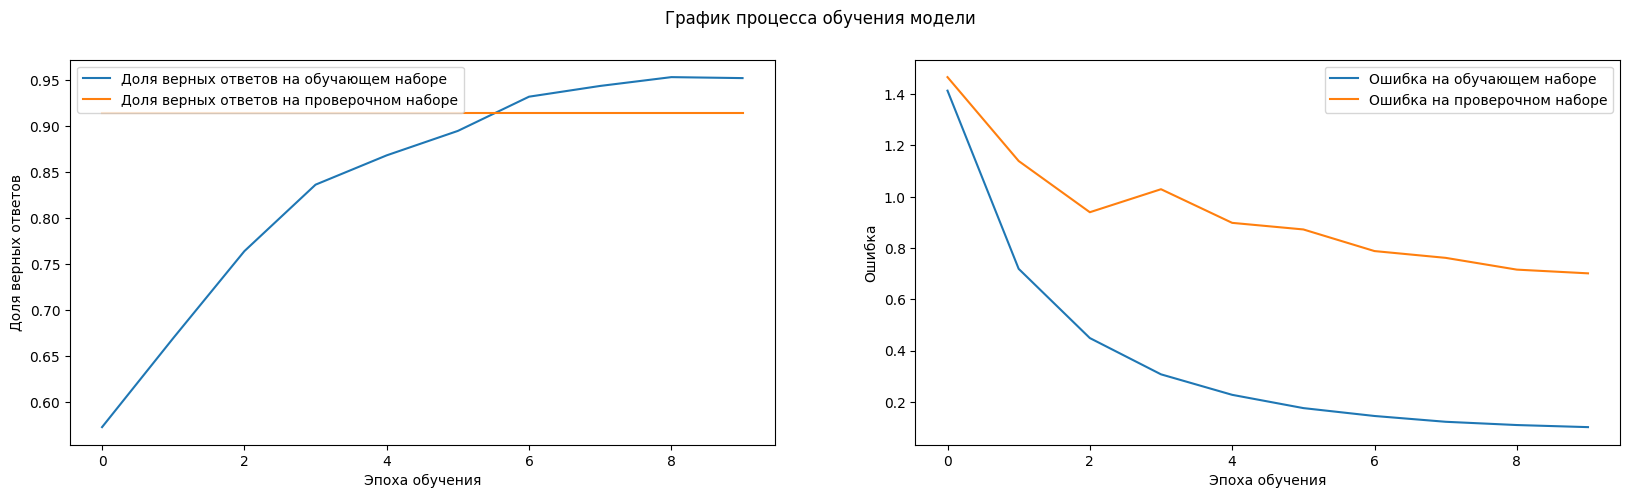

10/10 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.8984
Оценка на тестовых данных:
Test loss: 0.7262, Test accuracy: 0.8984
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.4732
Precision: 0.4492
Recall: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


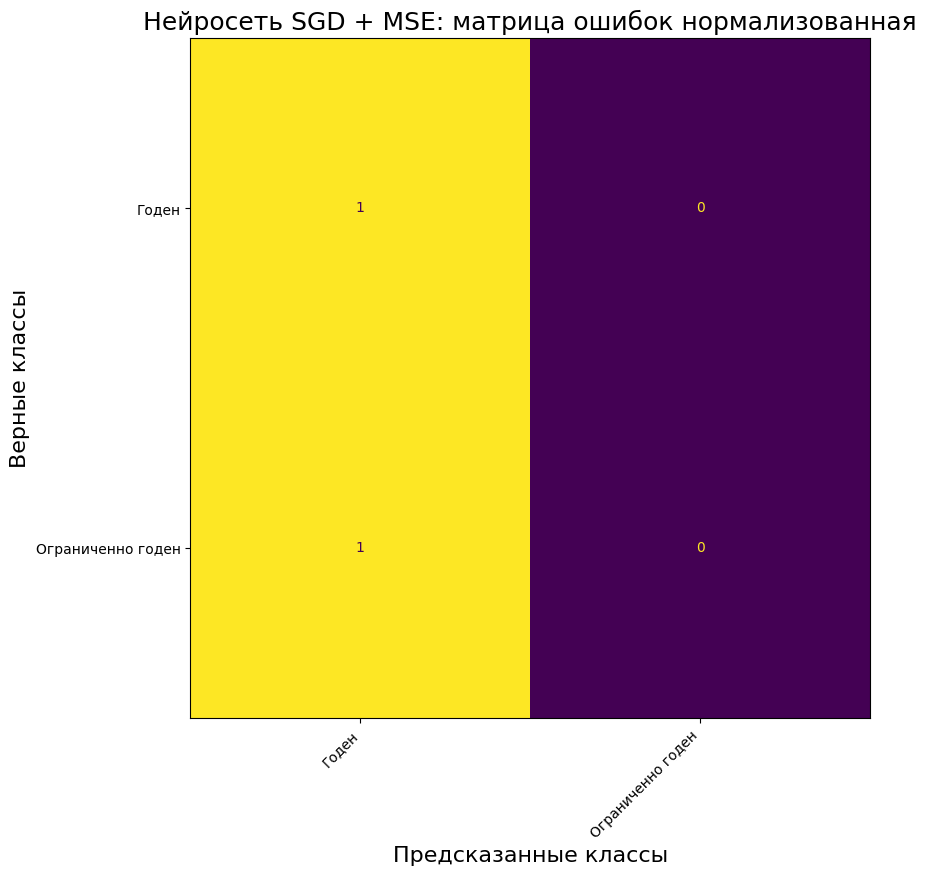

----------------------------------------------------------------------------------------------------
Нейросеть: SGD + MSE
Класс: Годен                100% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен    100% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  50%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='selu')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='SGD',
                         loss='mean_squared_error',
                         epochs=15,
                         batch_size=128,
                         title='SGD + MSE')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 525)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 525)         2100        ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_11 (BatchN  (None, 100)         400         ['input_4[0][0]']          

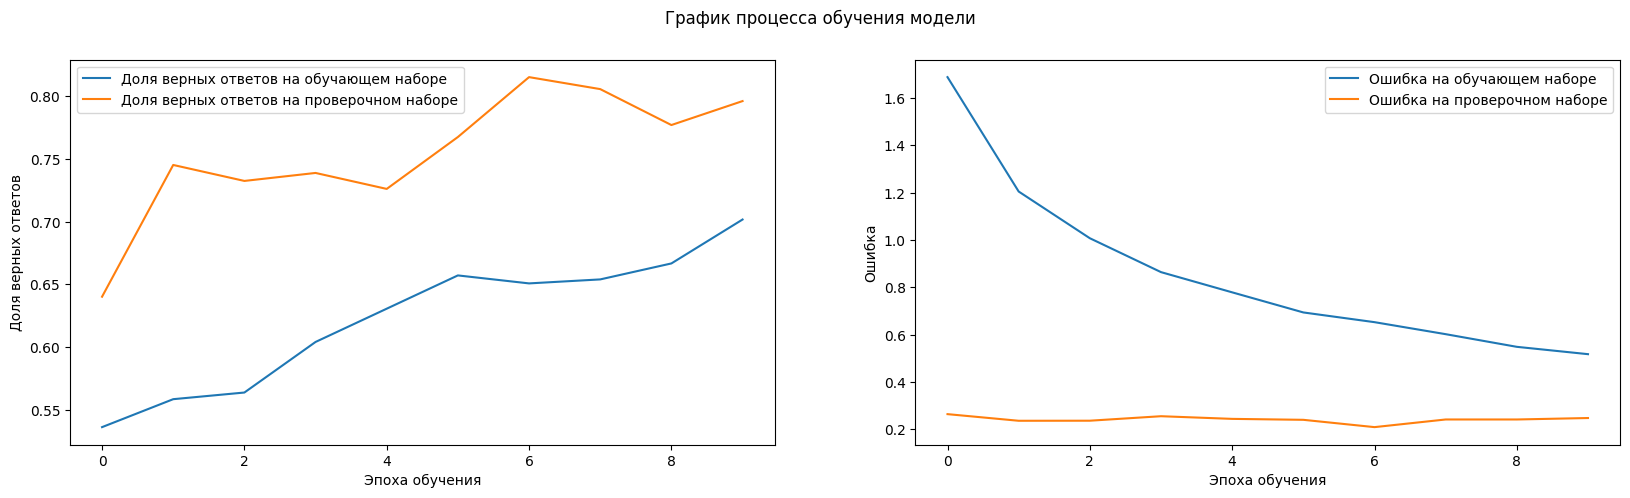

10/10 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.7937
Оценка на тестовых данных:
Test loss: 0.2501, Test accuracy: 0.7937
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.6228
Precision: 0.6072
Recall: 0.7050


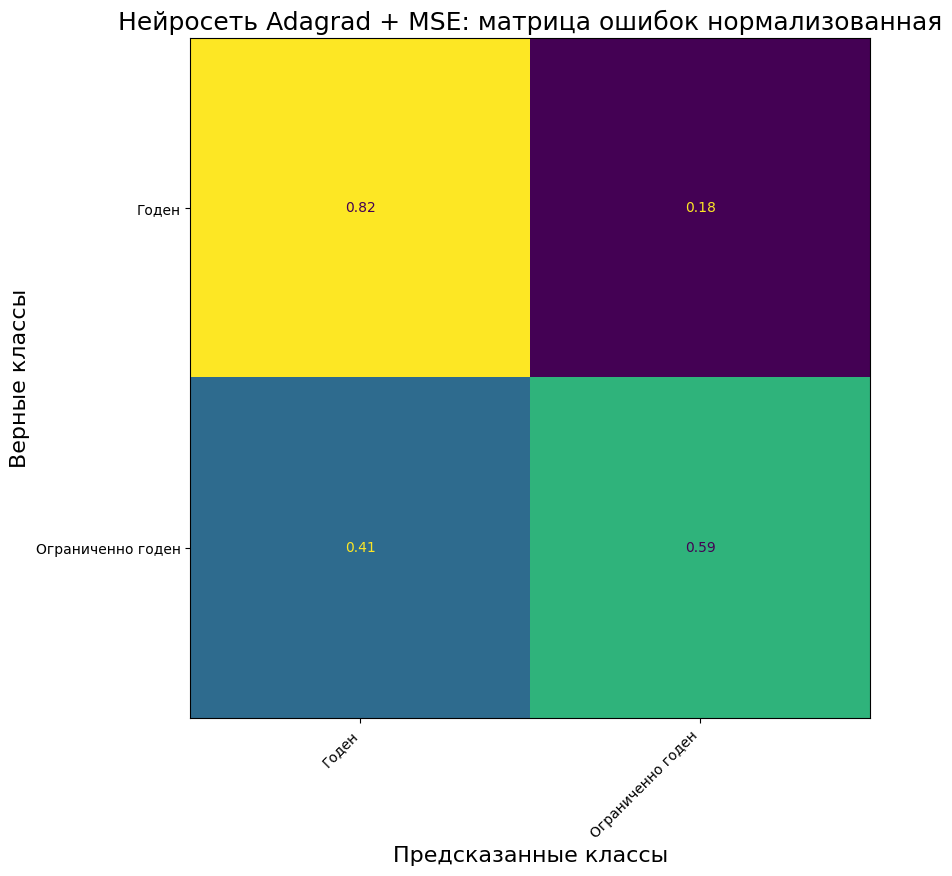

----------------------------------------------------------------------------------------------------
Нейросеть: Adagrad + MSE
Класс: Годен                 82% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     59% сеть отнесла к классу Ограниченно годен    - ВЕРНО :-)

Средняя точность распознавания:  70%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='selu')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='Adagrad',
                         loss='mean_squared_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='Adagrad + MSE')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 525)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_16 (BatchN  (None, 525)         2100        ['input_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_19 (BatchN  (None, 100)         400         ['input_6[0][0]']          

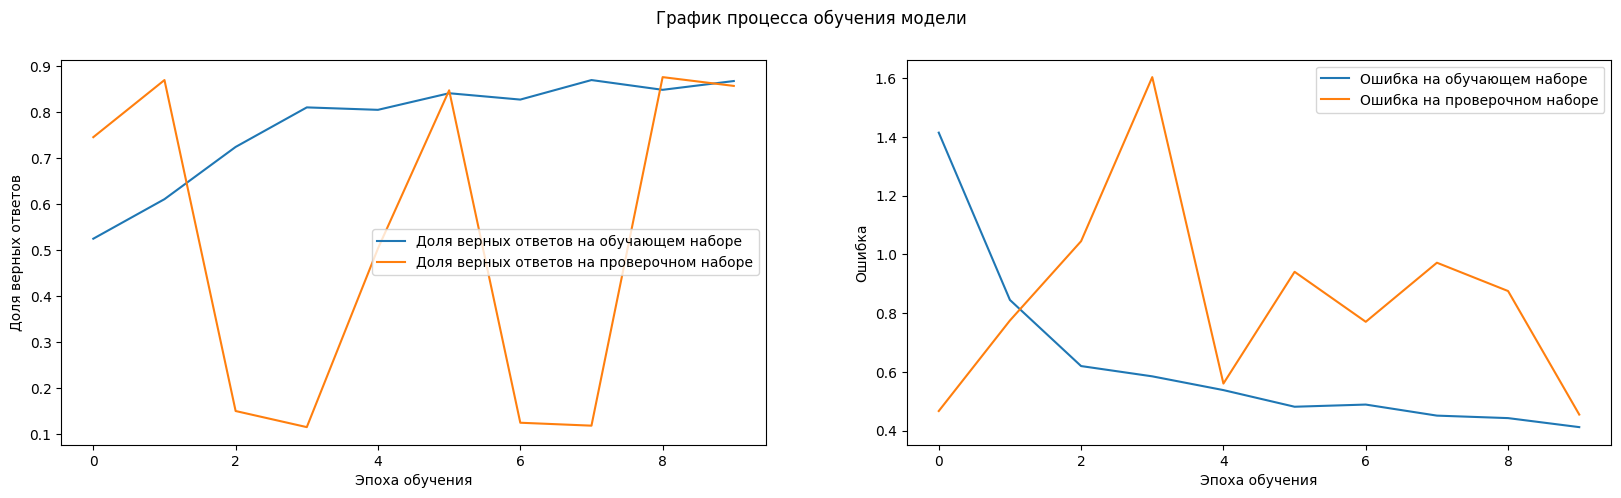

10/10 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.8349
Оценка на тестовых данных:
Test loss: 0.4664, Test accuracy: 0.8349
10/10 [==============================] - 0s 3ms/step
Метрики:
F1 Score: 0.5714
Precision: 0.5681
Recall: 0.5755


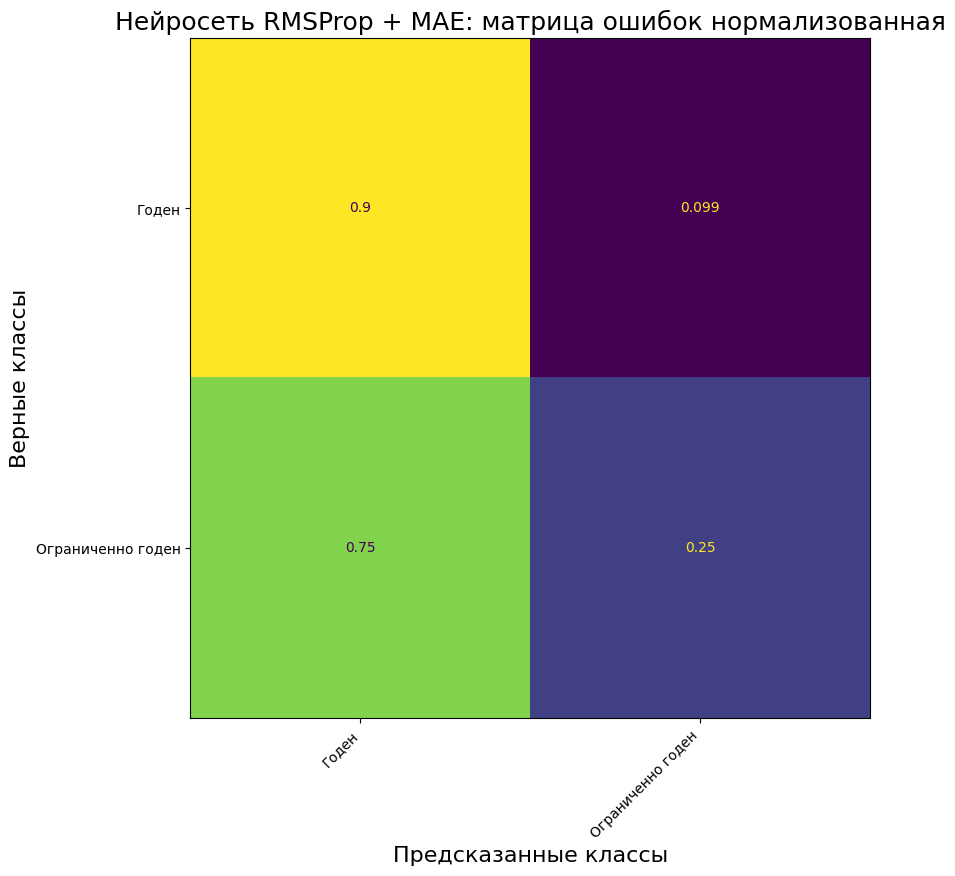

----------------------------------------------------------------------------------------------------
Нейросеть: RMSProp + MAE
Класс: Годен                 90% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     75% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  58%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='selu')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='RMSProp',
                         loss='mean_absolute_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='RMSProp + MAE')

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 525)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_32 (BatchN  (None, 525)         2100        ['input_9[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_35 (BatchN  (None, 100)         400         ['input_10[0][0]']         

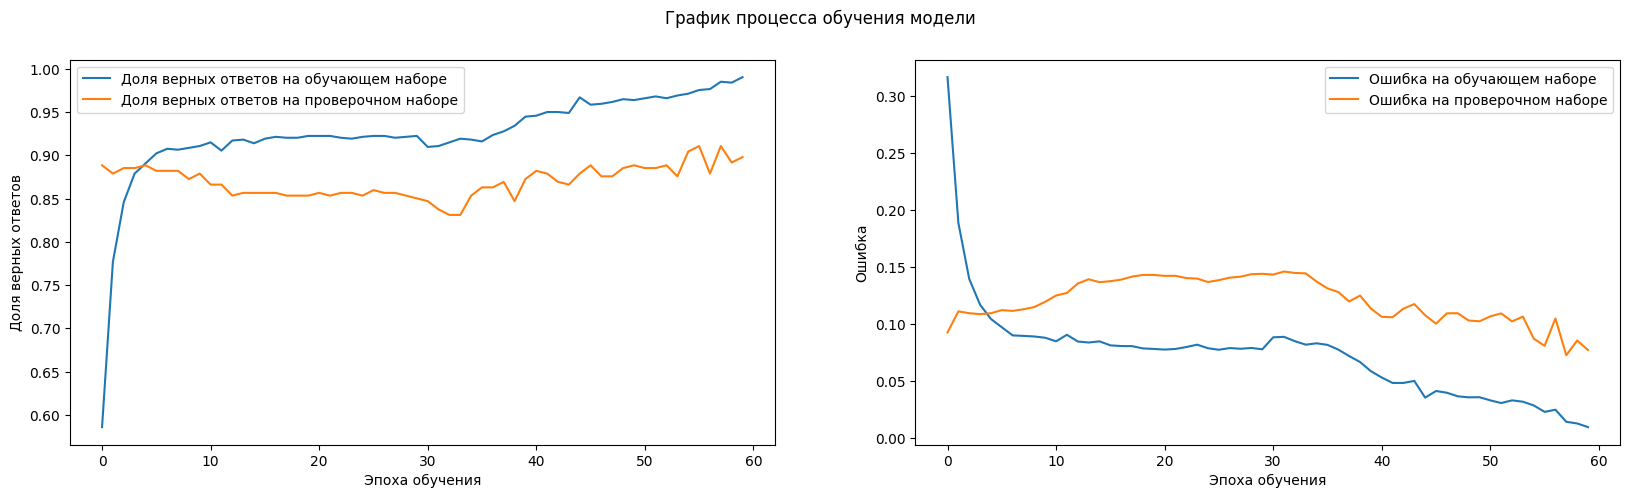

10/10 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9016
Оценка на тестовых данных:
Test loss: 0.0838, Test accuracy: 0.9016
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.6436
Precision: 0.7267
Recall: 0.6126


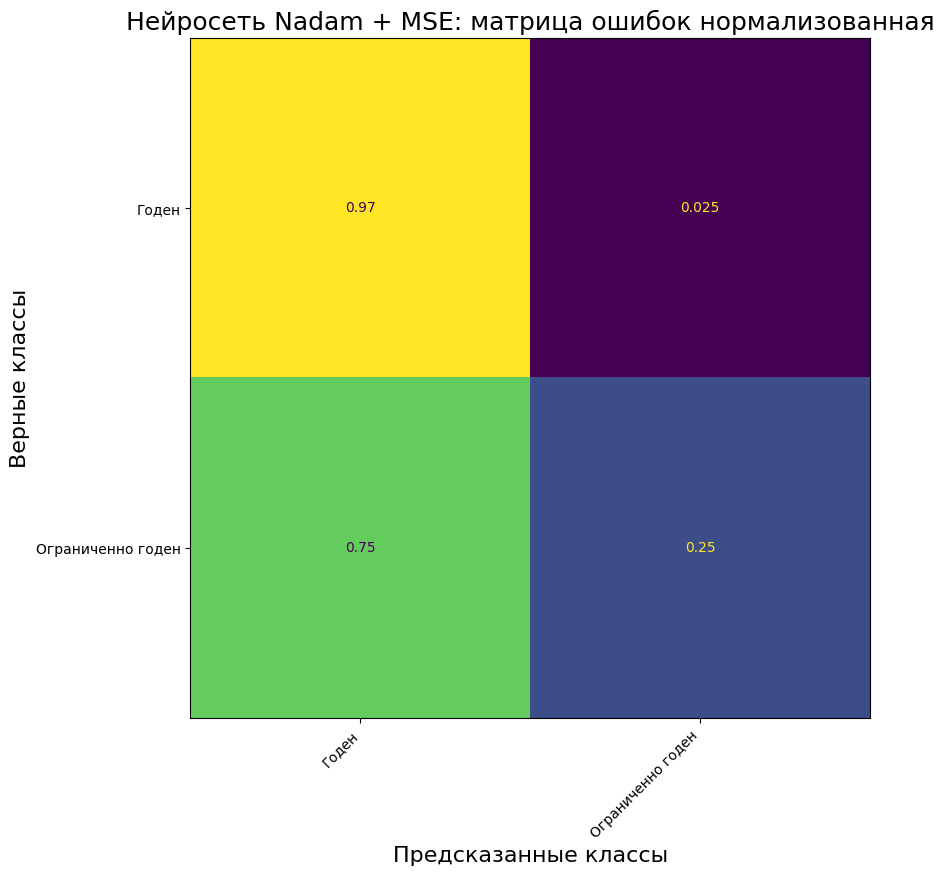

----------------------------------------------------------------------------------------------------
Нейросеть: Nadam + MSE
Класс: Годен                 98% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     75% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  61%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='Nadam',
                         loss='mean_squared_error',
                         epochs=30,
                         batch_size=128,
                         title='Nadam + MSE')

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 525)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_40 (BatchN  (None, 525)         2100        ['input_11[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_43 (BatchN  (None, 100)         400         ['input_12[0][0]']         

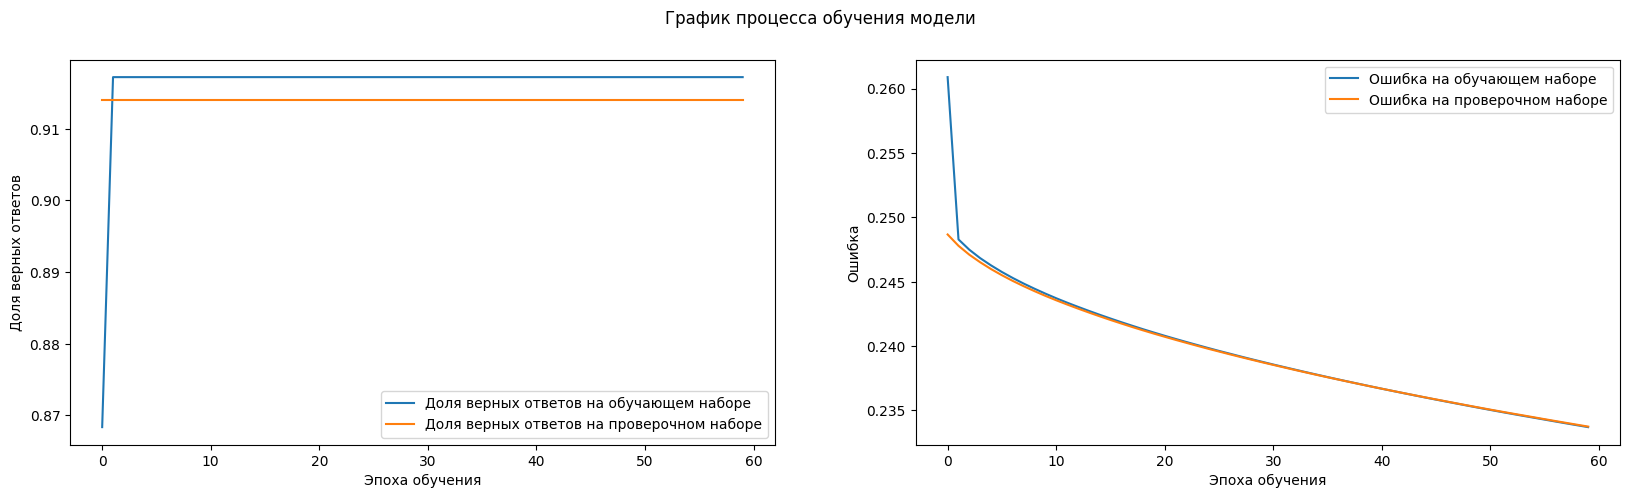

10/10 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.8984
Оценка на тестовых данных:
Test loss: 0.2344, Test accuracy: 0.8984
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.4732
Precision: 0.4492
Recall: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


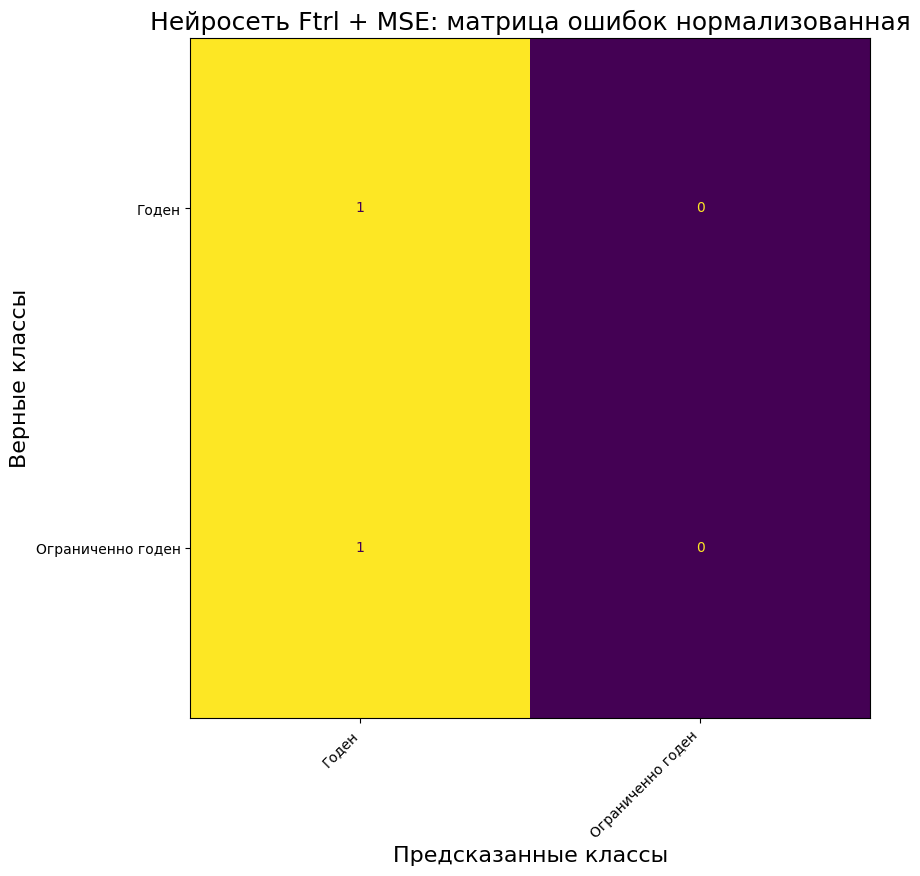

----------------------------------------------------------------------------------------------------
Нейросеть: Ftrl + MSE
Класс: Годен                100% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен    100% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  50%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='Ftrl',
                         loss='mean_squared_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='Ftrl + MSE')

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 525)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_48 (BatchN  (None, 525)         2100        ['input_13[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_51 (BatchN  (None, 100)         400         ['input_14[0][0]']         

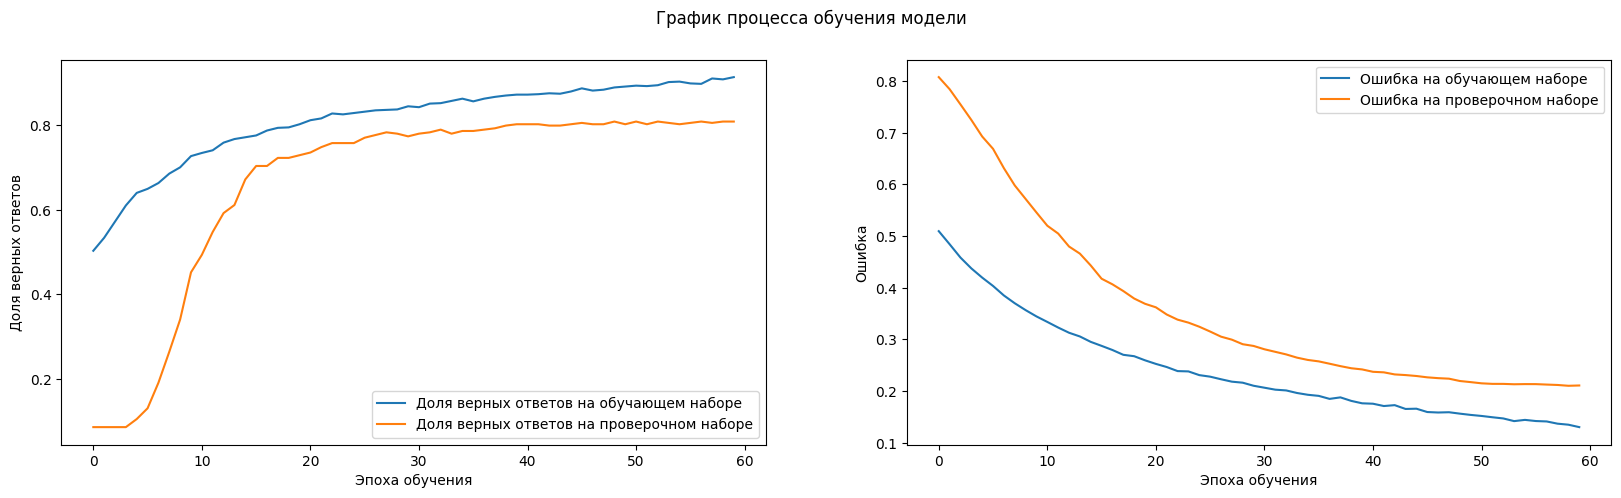

10/10 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.8190
Оценка на тестовых данных:
Test loss: 0.2182, Test accuracy: 0.8190
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.6045
Precision: 0.5915
Recall: 0.6360


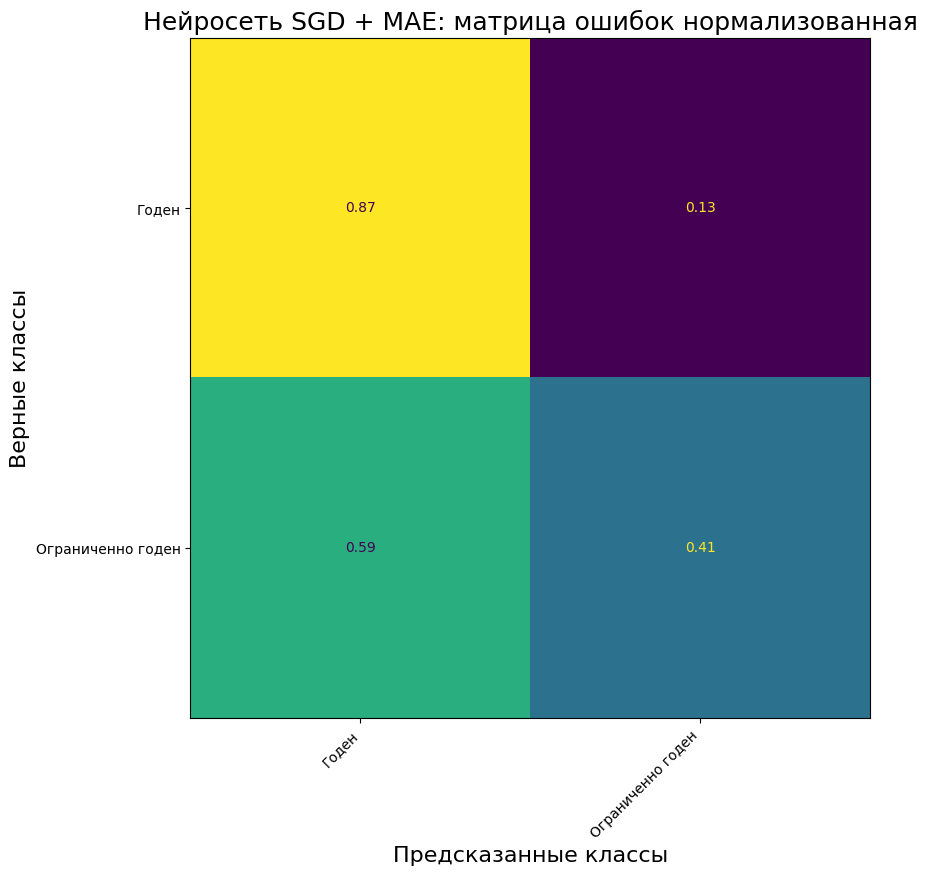

----------------------------------------------------------------------------------------------------
Нейросеть: SGD + MAE
Класс: Годен                 87% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     59% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  64%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='SGD',
                         loss='mean_absolute_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='SGD + MAE')

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 525)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_56 (BatchN  (None, 525)         2100        ['input_15[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 100)         400         ['input_16[0][0]']         

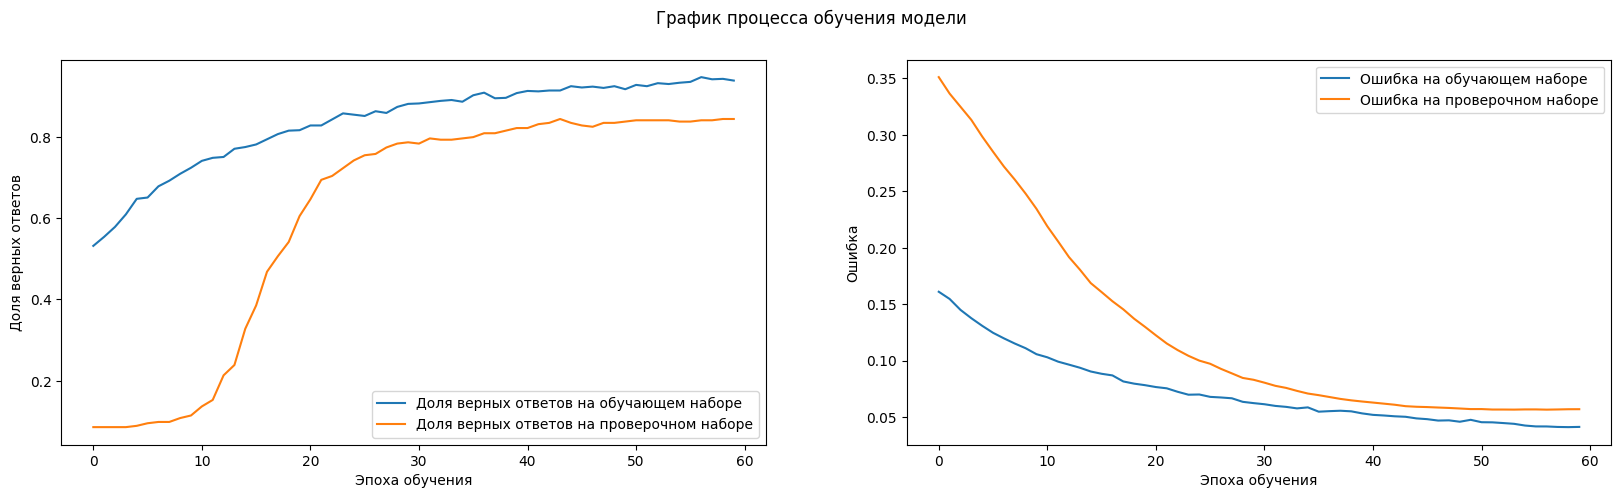

10/10 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.8635
Оценка на тестовых данных:
Test loss: 0.0566, Test accuracy: 0.8635
10/10 [==============================] - 0s 3ms/step
Метрики:
F1 Score: 0.6409
Precision: 0.6357
Recall: 0.6469


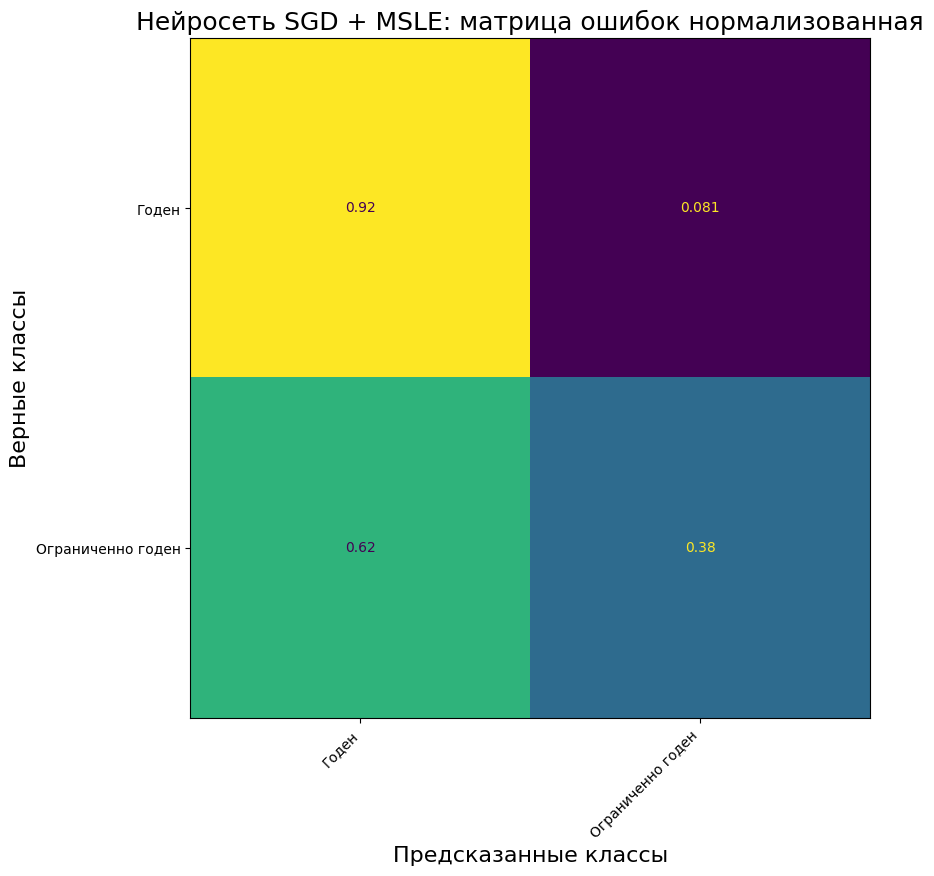

----------------------------------------------------------------------------------------------------
Нейросеть: SGD + MSLE
Класс: Годен                 92% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     62% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  65%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='SGD',
                         loss='mean_squared_logarithmic_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='SGD + MSLE')

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 525)]        0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_64 (BatchN  (None, 525)         2100        ['input_17[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_67 (BatchN  (None, 100)         400         ['input_18[0][0]']         

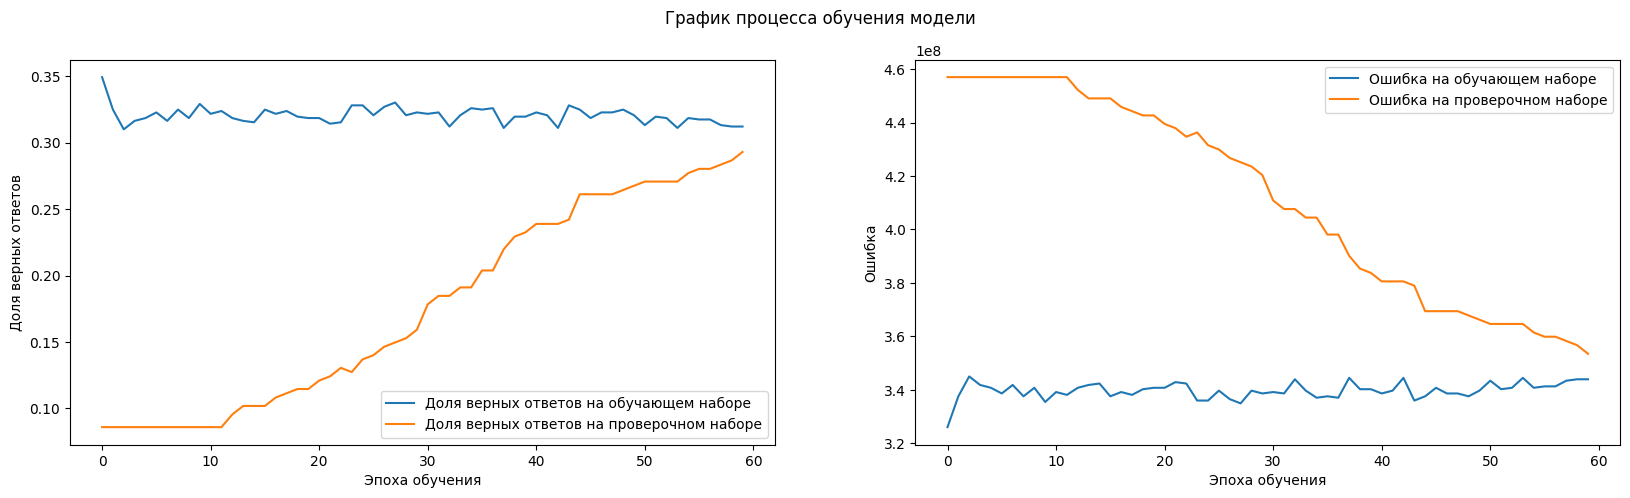

10/10 [==============================] - 0s 4ms/step - loss: 344444512.0000 - accuracy: 0.3111
Оценка на тестовых данных:
Test loss: 344444512.0000, Test accuracy: 0.3111
10/10 [==============================] - 0s 3ms/step
Метрики:
F1 Score: 0.2795
Precision: 0.4552
Recall: 0.3949


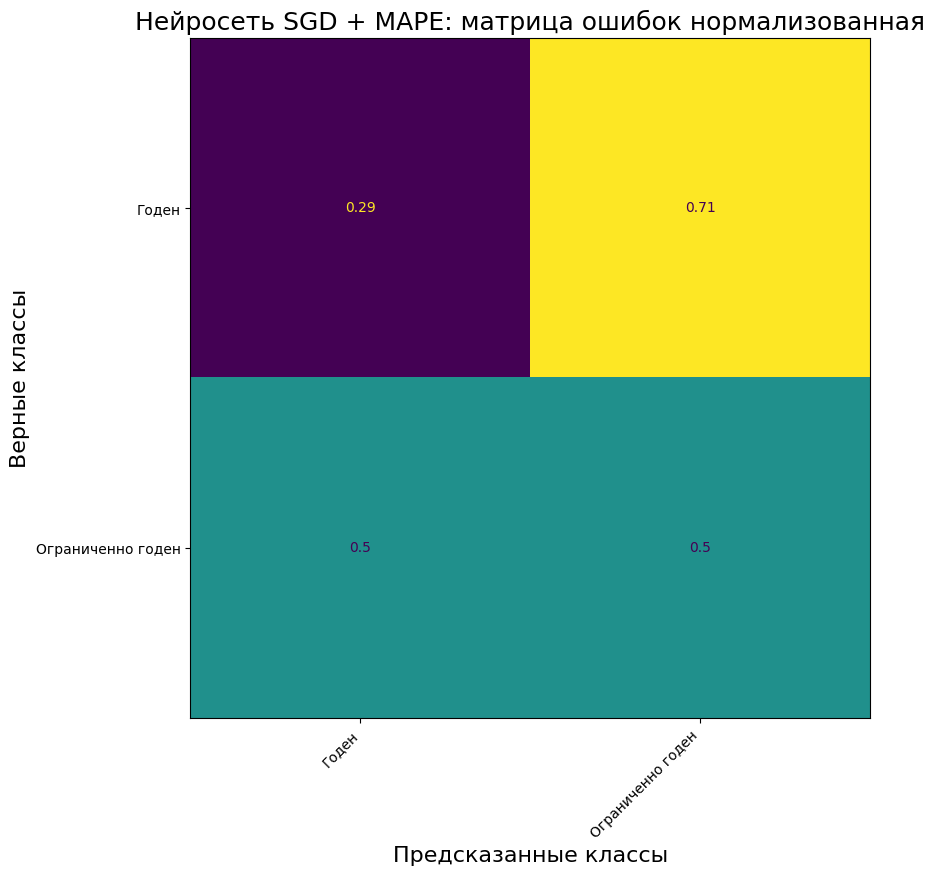

----------------------------------------------------------------------------------------------------
Нейросеть: SGD + MAPE
Класс: Годен                 71% сеть отнесла к классу Ограниченно годен    - НЕВЕРНО :-(
Класс: Ограниченно годен     50% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  40%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='SGD',
                         loss='mean_absolute_percentage_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='SGD + MAPE')

Модель с лучшими показателями:

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 525)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_24 (BatchN  (None, 525)         2100        ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 100)         400         ['input_8[0][0]']          

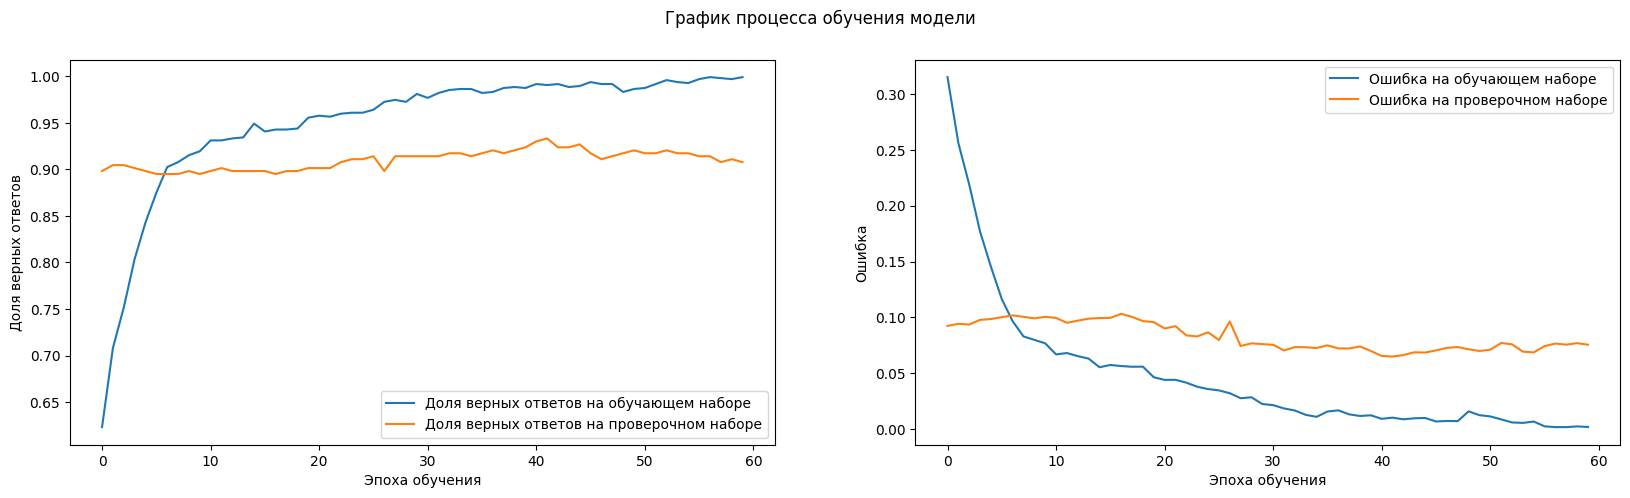

10/10 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9175
Оценка на тестовых данных:
Test loss: 0.0821, Test accuracy: 0.9175
10/10 [==============================] - 0s 2ms/step
Метрики:
F1 Score: 0.6824
Precision: 0.8370
Recall: 0.6353


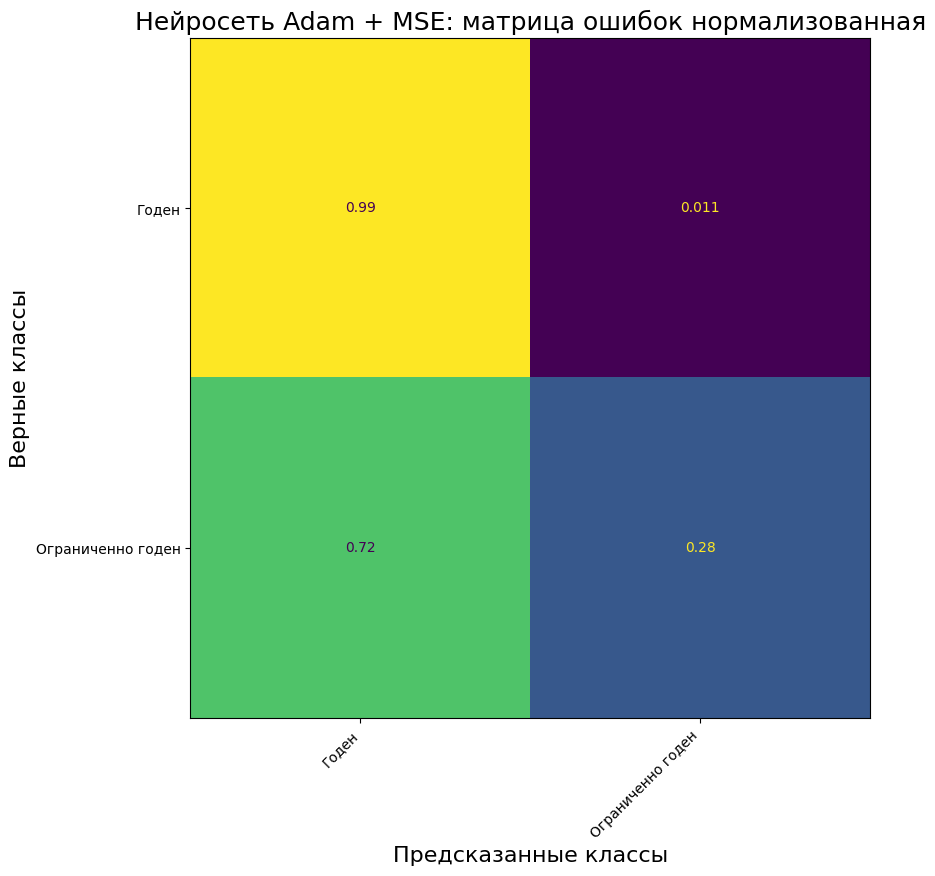

----------------------------------------------------------------------------------------------------
Нейросеть: Adam + MSE
Класс: Годен                 99% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     72% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  64%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='softmax')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='Adam',
                         loss='mean_squared_error',
                         epochs=30,
                         batch_size=128,
                        #  class_labels=CLASS_LIST,
                         title='Adam + MSE')

In [ ]:
# сохранение лучшей модели
model.save('model_profpat.h5')

In [ ]:
# Перенос сохраненной модели из папки /content на гугл диск
!cp -r /content/model_profpat.h5 /content/drive/MyDrive/project

## Выводы:
По кончании серии исследований построена и обучена модель с показателем точности по метрики accuracy равной 92%, это наиболее высокий показатель. Стоит отметить, что в данной работе метрика accuracy является не показательной, лучше отражают работоспосбность модели метрики F1 Score: 0.6824, Precision: 0.8370, Recall: 0.6353. Ткаим образом, достигнутая точность составила 64%, что скорее является угадыванием принадлежности к классам, а не предсказанием.
Такой низкий и неудовлетворительный результат связываю с исходнными данными, представленными заказчиком, где явно имеет место быть разбалансировка классов - 137 значений класса "Ограниченно годен" против 1434 значений класса "Годен" (8% против 92%).
Таким образом, выводом проведенных исследований является необхожимсоть предоставления сбалансированного по классам датасета.